In [1]:
from gensim.models import Word2Vec
import pandas as pd
import os



**Word Embeddings** Definition Word embeddings are a type of word representation that look at the context of words which allows words with similar meaning to have a similar vector representation.


Each word is represented as  a vector.


Each word is mapped to one vector and the vector values are learned in a way that resembles a neural network.



**Word2Vec**

Word2Vec is a shallow, two-layer neural networks which is trained to reconstruct linguistic contexts of words.
Input: Large Corpus of words


Output: Vector Space, with each unique word in the corpus being assigned a corresponding vector in the space.


Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.


**Deep Network** Deep network takes the sequence of embedding vectors as input and converts them to a compressed representation. The compressed representation effectively captures all the information in the sequence of words in the text. The deep neywrok part is usually an RNN or some forms of it like LSTM/GRU. The dropout is added to overcome the tendency to overfit, a very common problem with RNN based networks.

**Recurrent Neural Networks** Recurrent Neural Networks are used to handle sequential data. One of the appeals of RNNs is the idea that they might be able to connect previous information to the present task, such as using previous video frames/words might inform the understanding of the present frame/words. 


Sometimes, we only need to look at recent information to perform the present task. But Unfortunately, as that gap grows, RNNs become unable to learn to connect the information.

Standard RNNs fail to learn in the presence of time lags greater than 5 – 10 discrete time steps between relevant input events and target signals. The vanishing error problem casts doubt on whether standard RNNs can indeed exhibit significant practical advantages over time window-based feedforward networks. A recent model, “Long Short-Term Memory” (LSTM), is not affected by this problem. LSTM can learn to bridge minimal time lags in excess of 1000 discrete time steps by enforcing constant error flow through “constant error carrousels” (CECs) within special units, called cells

 
https://towardsdatascience.com/machine-learning-word-embedding-sentiment-classification-using-keras-b83c28087456

https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21
**LSTM** Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

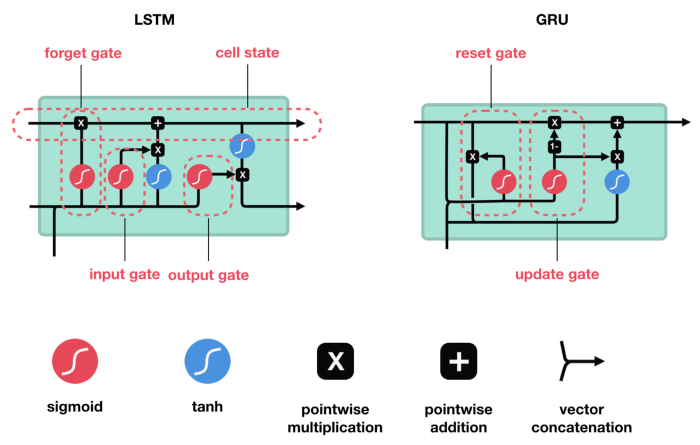

**GRU** GRU (Gated Recurrent Unit) aims to solve the vanishing gradient problem which comes with a standard recurrent neural network. GRU can also be considered as a variation on the LSTM because both are designed similarly and, in some cases, produce equally excellent results.

Tweets have been classified as **covid-19-related (1)** or **not covid-19-related (0)**. All tweets have had the following keywords removed:

-corona

-coronavirus

-covid

-covid19

-covid-19

-sarscov2

-19

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## Loading Data

In [3]:
df = pd.read_csv("updated_train.csv")

In [4]:
df.head()

,ID,text,target
0,train_0,The bitcoin halving is cancelled due to,1
1,train_1,MercyOfAllah In good times wrapped in its gran...,0
2,train_2,266 Days No Digital India No Murder of e learn...,1
3,train_3,India is likely to run out of the remaining RN...,1
4,train_4,In these tough times the best way to grow is t...,0


In [5]:
df = df[['text', 'target']]

In [6]:
df.head()

,text,target
0,The bitcoin halving is cancelled due to,1
1,MercyOfAllah In good times wrapped in its gran...,0
2,266 Days No Digital India No Murder of e learn...,1
3,India is likely to run out of the remaining RN...,1
4,In these tough times the best way to grow is t...,0



# Data Preprocessing

1. **Tokenization** is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords.

2. Removing **Punctuations**

3. Removing tokens which are alphabetic

4. **Stopwords Removal**: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) 


In [7]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

lines = df['text'].values.tolist()

review_lines = []

for line in lines:
    tokens = word_tokenize(line)
    tokens = [word.lower() for word in tokens]

    table = str.maketrans("","", string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    words = [word for word in stripped if word.isalpha()]

    stop_words = set(stopwords.words('english'))

    words = [word for word in words if not word in stop_words]

    review_lines.append(words)

In [8]:
review_lines

[['bitcoin', 'halving', 'cancelled', 'due'],
 ['mercyofallah',
  'good',
  'times',
  'wrapped',
  'granular',
  'detail',
  'challenge',
  'find',
  'meaning',
  'model',
  'humility'],
 ['days',
  'digital',
  'india',
  'murder',
  'e',
  'learning',
  'online',
  'business',
  'restore',
  'j',
  'amp',
  'k'],
 ['india',
  'likely',
  'run',
  'remaining',
  'rna',
  'kits',
  'essential',
  'testing',
  'one',
  'week',
  'gov'],
 ['tough',
  'times',
  'best',
  'way',
  'grow',
  'learn',
  'case',
  'teach',
  'help',
  'people',
  'learn',
  'connect',
  'sports',
  'anal'],
 ['fifa',
  'proposed',
  'allowing',
  'teams',
  'make',
  'five',
  'substitutions',
  'per',
  'match',
  'help',
  'players',
  'cope',
  'return',
  'action'],
 ['lovers',
  'sports',
  'especially',
  'know',
  'sometimes',
  'time',
  'changes',
  'done',
  'name',
  'daylight',
  'saving',
  'time',
  'dst',
  'practice',
  'setting',
  'clocks',
  'forward',
  'one',
  'hour',
  'standard',
  't

In [9]:
from gensim.models import Word2Vec

EMBEDDING_DIM = 100

model = Word2Vec(
    sentences=review_lines,
    vector_size=EMBEDDING_DIM,
    window=5,
    workers=4,
    min_count=1
)


**Saving** the word2vec model

In [10]:
file_name = 'covid_tweet_embedding_word2vec.txt'
model.wv.save_word2vec_format(file_name, binary=False)

Lets test our Word2Vec Model to see how it performs

In [11]:
model.wv.most_similar('lockdown')

[('amp', 0.9955136179924011),
 ('people', 0.9948266744613647),
 ('sports', 0.9947317838668823),
 ('like', 0.9946250915527344),
 ('one', 0.9942336082458496),
 ('new', 0.9939965009689331),
 ('time', 0.9937521815299988),
 ('world', 0.9936785697937012),
 ('us', 0.9936642646789551),
 ('make', 0.9936463236808777)]

In [12]:
import os
embedding_index = {}
f = open('covid_tweet_embedding_word2vec.txt', encoding='utf-8')
for line in f:
    values= line.split()
    word= values[0]
    coefs = np.asarray(values[1:])
    embedding_index[word] = coefs
f.close()

Let’s see the result of semantically reasonable word vectors (king - man + woman)


In [13]:
embedding_index

{'13431': array(['100'], dtype='<U3'),
 'ramadan': array(['-0.09424224', '0.17099762', '0.06962513', '0.048266385',
        '0.08289119', '-0.29915404', '0.06838191', '0.404216',
        '-0.071781315', '-0.04837747', '-0.07545778', '-0.29865447',
        '-0.056428626', '0.19282205', '0.063573', '-0.15917957',
        '0.07332843', '-0.23245072', '0.03351004', '-0.34309062',
        '0.10257163', '0.11103069', '0.107825525', '-0.09784983',
        '0.06862895', '-0.010153439', '-0.1557417', '-0.06761351',
        '-0.14542854', '-0.047408205', '0.20623258', '0.005699739',
        '0.05004351', '-0.10914337', '-0.0562752', '0.13541082',
        '-0.0104446765', '-0.18348667', '-0.063851506', '-0.40806356',
        '-0.039265413', '-0.12463533', '-0.07138024', '-0.012058839',
        '0.15902928', '-0.057179466', '-0.19406277', '-0.014548276',
        '0.15513675', '0.16289821', '0.0635754', '-0.14805372',
        '-0.13846572', '0.00781629', '-0.09574769', '0.07919845',
        '0.1503

**Odd One out** - Finding the odd word out of the given list of words

In [14]:
df.shape
x_train = df.loc[:4200, 'text'].values
y_train = df.loc[:4200, 'target'].values
x_test = df.loc[4201:, 'text'].values
y_test = df.loc[4201:, 'target'].values

Save model in ASCII (word2vec) format

In [15]:
# let us try some utility functions of gensim word2vec more details here 



**Tokenization** is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. 

**Padding** All the neural networks require to have inputs that have the same shape and size. However, when we pre-process and use the texts as inputs for our model e.g. LSTM, not all the sentences have the same length. In other words, naturally, some of the sentences are longer or shorter. We need to have the inputs with the same size, this is where the padding is necessary.

**Splitting the data** 

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(tweet_lines)
sequences = tokenizer_obj.texts_to_sequences(tweet_lines)
print(sequences)

max_length = 100

tweet_pad = pad_sequences(sequences, maxlen=max_length)
print(tweet_pad)

labels = df['target'].values

TEST_SPLIT = 0.2

indices = np.arange(tweet_pad.shape[0])
np.random.shuffle(indices)
tweet_pad= tweet_pad[indices]
labels = labels[indices]

num_test_samples = int(TEST_SPLIT*review_pad.shape[0])

x_train_pad = review_pad[:-num_test_samples]
y_train_pad = labels[:-num_test_samples]
x_test_pad = review_pad[-num_test_samples:]
y_test_pad = labels[-num_test_samples:]

print(x_train_pad.shape, x_test_pad.shape)

NameError: name 'tweet_lines' is not defined

In [ ]:
EMBEDDING_DIM = 100
word_index = tokenizer_obj.word_index
num_words = len(ord_index)+1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    embedding_vector =embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

**Training** Defining Model

In Keras, A **Sequential model** is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
1. Load pre-trained word embeddings into an Embedding layer

2. Adding Convolution Layer

3. Pooling Layer

4. Adding Dense Layer
Note that we set trainable = False so as to keep the embeddings fixed

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Embedding,
    LSTM,
    GRU,
    Conv1D,
    MaxPooling1D,
    Flatten
)
from tensorflow.keras.initializers import Constant


In [ ]:
model = Sequential()
embedding_layer= Embedding(
    num_words,
    EMBBEDING_DIM,
    embedding_initializer = Constant(embedding_matrix),
    input_length=max_length,
    trainable=False
)

model.add(embedding_layer)
model.add(LSTM(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
odel.compile(loss='binary_crossentropy', optimzer='adam', metrics=['accuracy'])

print(model.summary())

In [ ]:
history = model.fit(x_train_pad, y_train_pad, batch_size=64, epochs=25, vaidation_data=(x_test_pad, y_test_pad))

In [ ]:
score, acc = model.evaluate(x_test_pad, y_test_pad, batch_size=64)
print(f"Score: {score}")
print(f"Accuracy: {acc}")

In [ ]:
print(history.history_keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
ptt.legend(['train', 'validation'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
ptt.legend(['train', 'validation'],loc='upper left')
plt.show()

In [ ]:
test_sample_1 = 'The pandemic is causing huge loss'
test_sample_2 = 'I like to eat pizza'

test_samples = [test_sample_1, test_saple_2]

test_samples_tokens = tokenizer_obj.texts_to_sequences(test_samples)
test_samples_tokens_pad = pad_sequences(test_samples_tokens, maxlen=100)

model.predict(x=test_samples_tokens_pad)

## Assigment: Build a GRU Model Using Keras!

